# Notebook to create Datasets 

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_swiss_roll, make_moons
from sklearn.manifold import MDS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

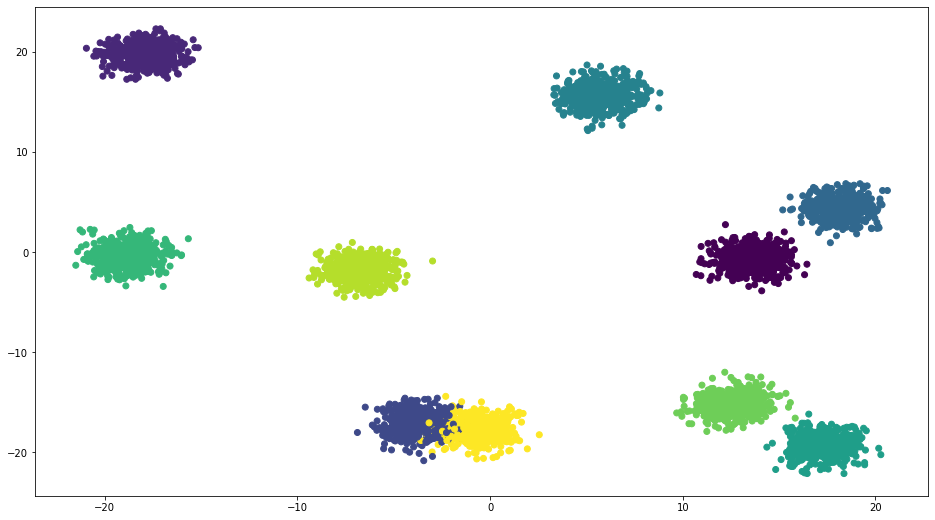

In [5]:
# Example settings
n_samples = 5000
outliers_fraction = 0
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
seed = 23
random.seed(seed)
c = 10


#building blobs
name = "blobs_size_"+str(n_samples)+"_centers_"+str(c)+"_outliers_"+str(n_outliers)
X, y = make_blobs(n_samples=n_inliers, centers=c,n_features=2, center_box=(-20,20))

#inserting noise
rng = np.random.RandomState(seed)
X = np.concatenate([X, rng.uniform(low=min(min(X[:,1]),min(X[:,0])), high=max(max(X[:,1]),max(X[:,0])), size=(n_outliers, 2))], axis=0)
y = np.concatenate([y,[c+1]*n_outliers], axis=0)

#saving and plotting
pd.DataFrame(X).to_csv(name+".csv",header=False, index=False)
plt.figure(figsize=[16, 9])
plt.scatter(X[:,1], X[:,0], c=y)
plt.savefig(name+".png")

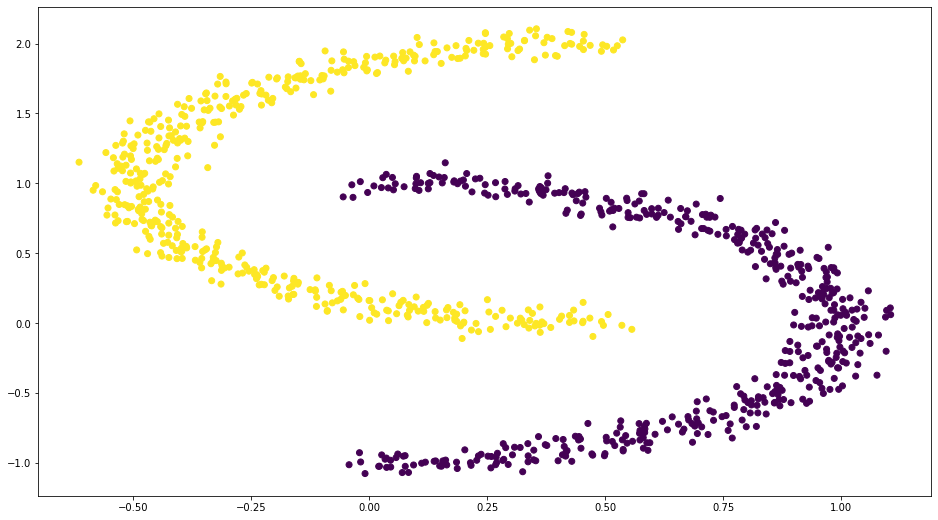

In [5]:
# Example settings
n_samples = 1000
outliers_fraction = 0
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
seed = 231
random.seed(seed)
c = 4


#building moons
name = "moons_size_"+str(n_samples)+"_outliers_"+str(n_outliers)
X, y = make_moons(n_samples=n_samples, noise=.05, random_state=seed)


#inserting noise
rng = np.random.RandomState(seed)
X = np.concatenate([X, rng.uniform(low=min(min(X[:,1]),min(X[:,0])), high=max(max(X[:,1]),max(X[:,0])), size=(n_outliers, 2))], axis=0)
y = np.concatenate([y,[c+1]*n_outliers], axis=0)

#saving and plotting
pd.DataFrame(X).to_csv(name+".csv",header=False, index=False)
plt.figure(figsize=[16, 9])
plt.scatter(X[:,1], X[:,0], c=y)
plt.savefig(name+".png")